## Visualisation of multidimensional data
### t-SNE algorithm (t-distributed Stochastic Neighbor Embedding)
### Author: Geoffrey Hinton

3.png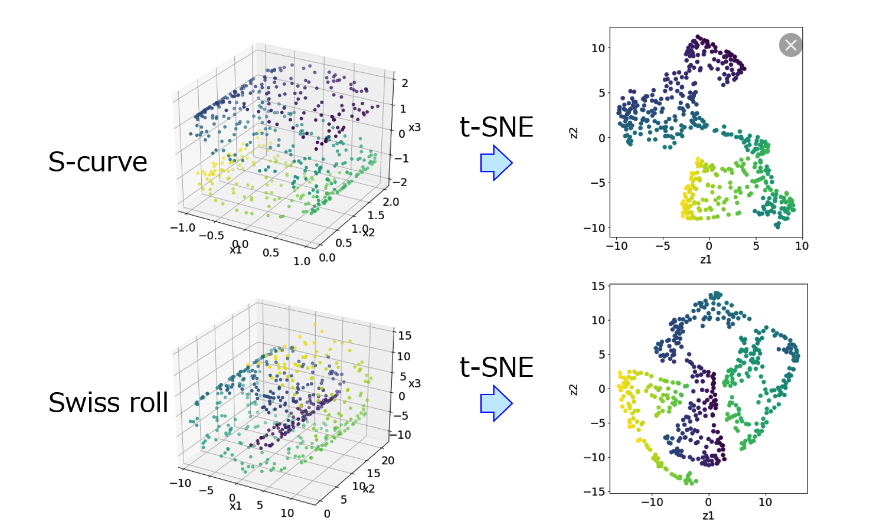

In [ ]:
# Uses the compactness hypothesis: similar points of d-dimensional space are stacked together
# We transforme the image(data) from the d-dimensional space into 2-dimensional (less often into 3-dimensional) space
# It means that we transforme the matrix [number of rows]*d[number of columns] to the matrix [number of rows]*[2]

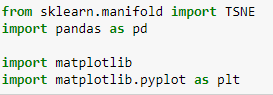

In [1]:
from sklearn.manifold import TSNE
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

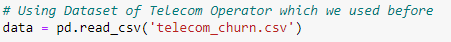

In [2]:
data = pd.read_csv('telecom_churn.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

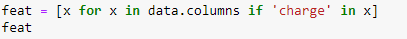

In [5]:
feat = [x for x in data.columns if 'charge' in x]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

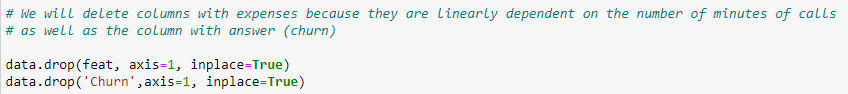

In [6]:
data.drop(feat, axis=1, inplace=True)
data.drop('Churn', axis=1, inplace=True)

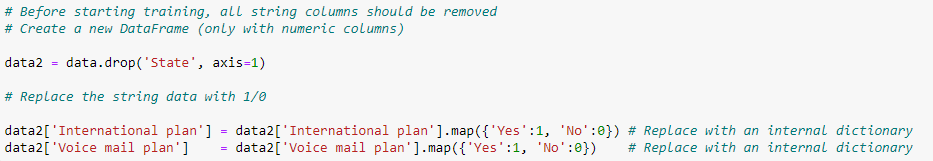

In [7]:
data2 = data.drop('State', axis=1)

data2['International plan'] = data2['International plan'].map({'Yes': 1, 'No': 0})
data2['Voice mail plan'] = data2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [8]:
data2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


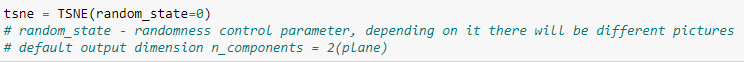

In [9]:
tsne = TSNE(random_state=0)

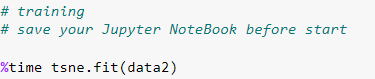

In [10]:
%time tsne.fit(data2)

CPU times: user 30.9 s, sys: 27.6 ms, total: 31 s
Wall time: 4.08 s


TSNE(random_state=0)

CPU times: total: 49.2 s
Wall time: 8.88 s


TSNE(random_state=0)

In [11]:
tsne.embedding_.shape

(3333, 2)

(3333, 2)

In [86]:
# this is a matrix with TWO features, which is the result of converting multidimensional space into two-dimensional

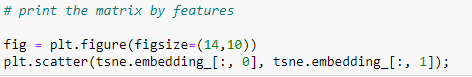

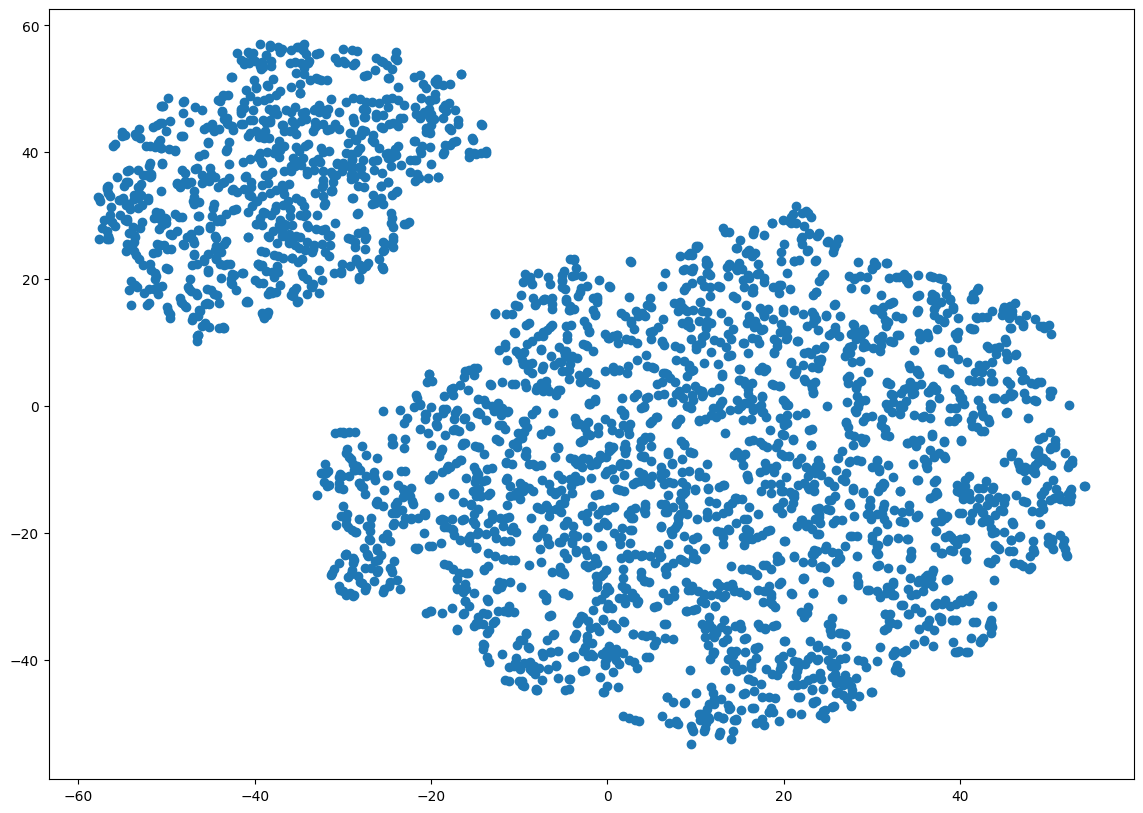

In [12]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

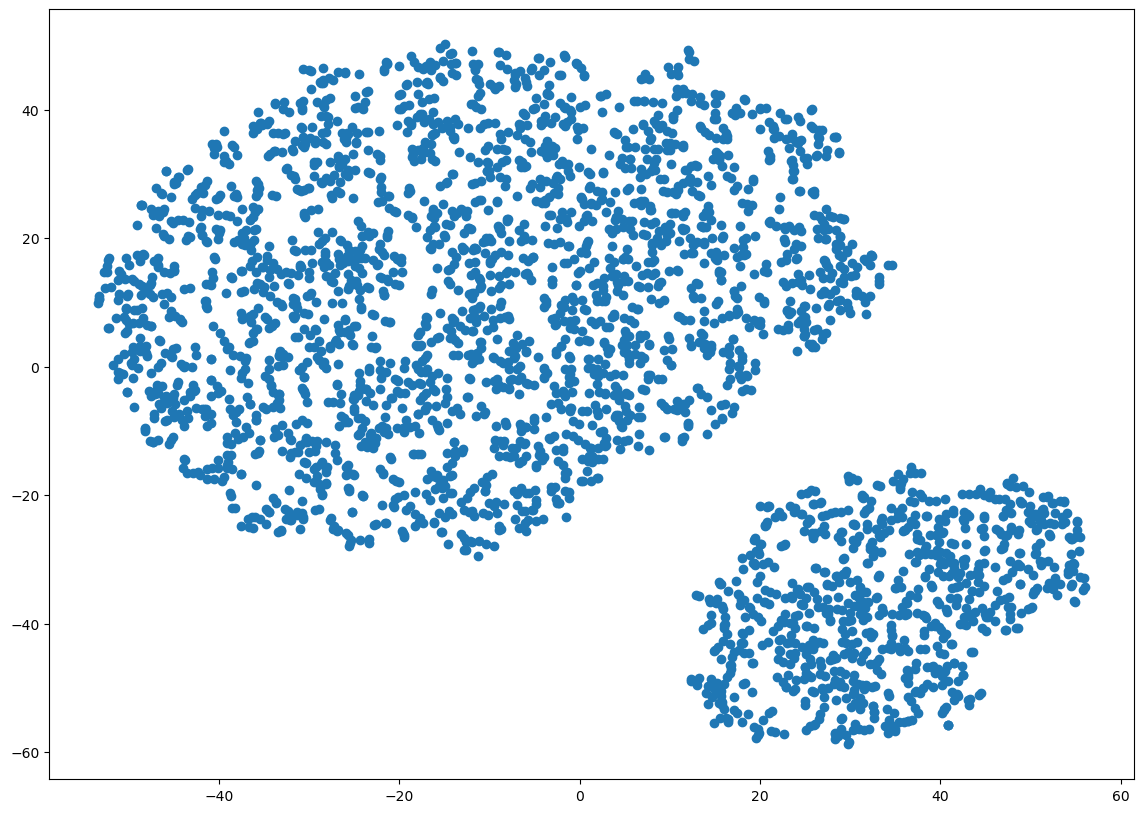

### 3D tSNE visualisation

In [13]:
tsne3D = TSNE(n_components=3, random_state=0)

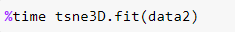

In [14]:
# training
# save your Jupyter NoteBook before start

%time tsne3D.fit(data2)

CPU times: user 1min 15s, sys: 11.1 ms, total: 1min 15s
Wall time: 9.63 s


TSNE(n_components=3, random_state=0)

CPU times: total: 2min 33s
Wall time: 28.6 s


TSNE(n_components=3, random_state=0)

In [15]:
tsne3D.embedding_.shape

(3333, 3)

(3333, 3)

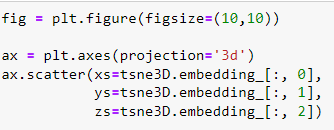

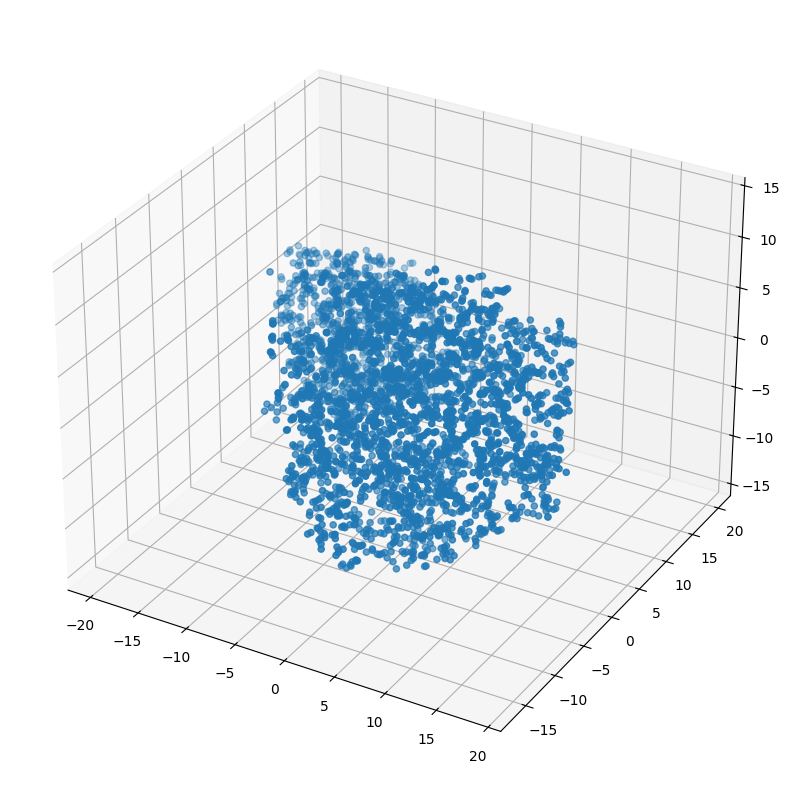

In [16]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection='3d')
ax.scatter(xs=tsne3D.embedding_[:, 0], ys=tsne3D.embedding_[:, 1], zs=tsne3D.embedding_[:, 2])

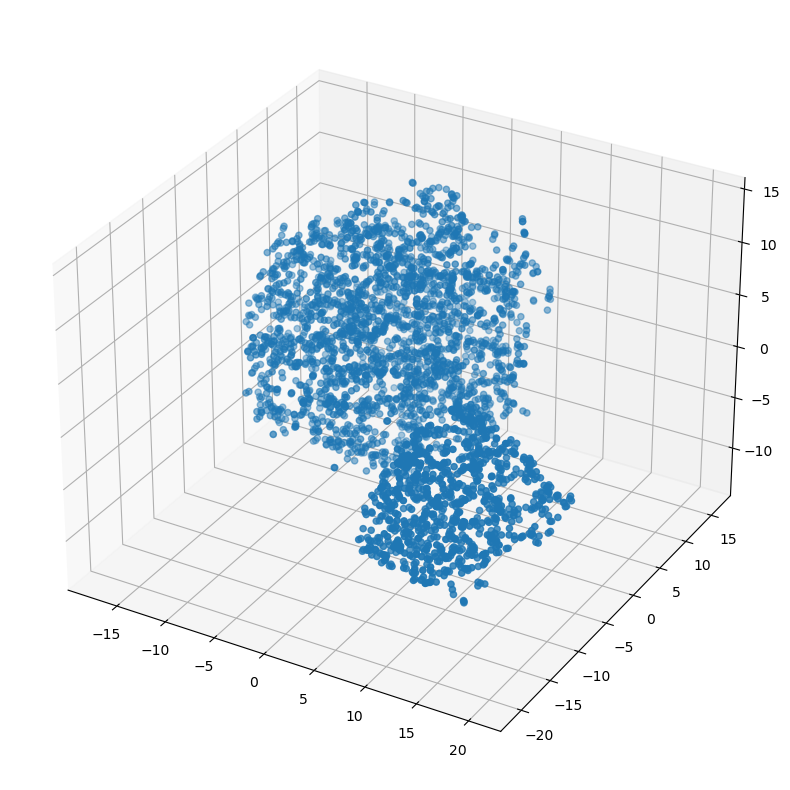

In [26]:
# Let's change the axes to get a better perspective

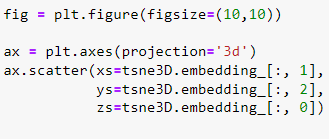

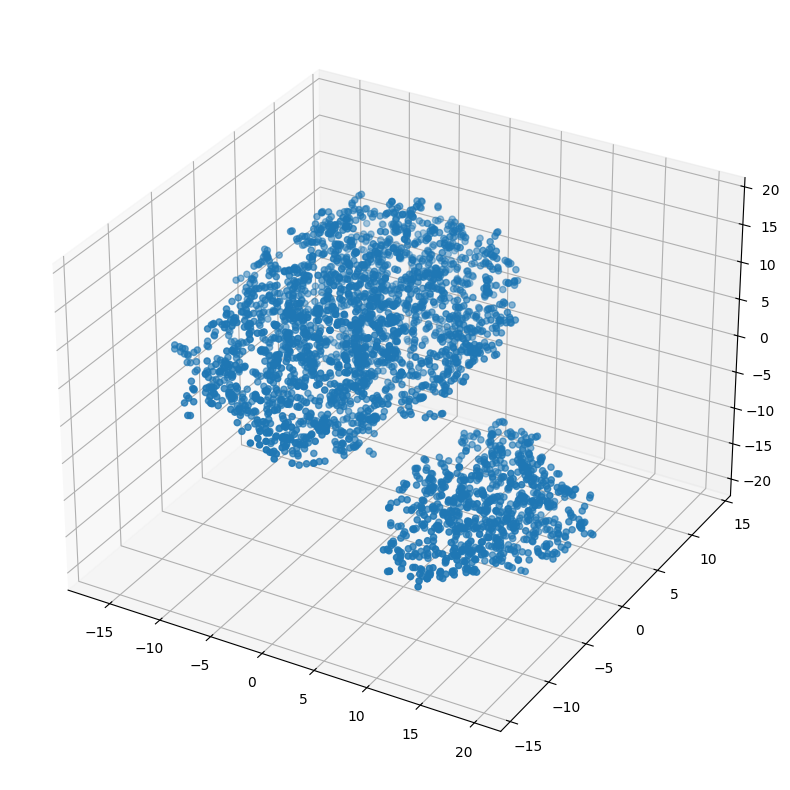

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(xs=tsne3D.embedding_[:, 1], ys=tsne3D.embedding_[:, 2], zs=tsne3D.embedding_[:, 0])

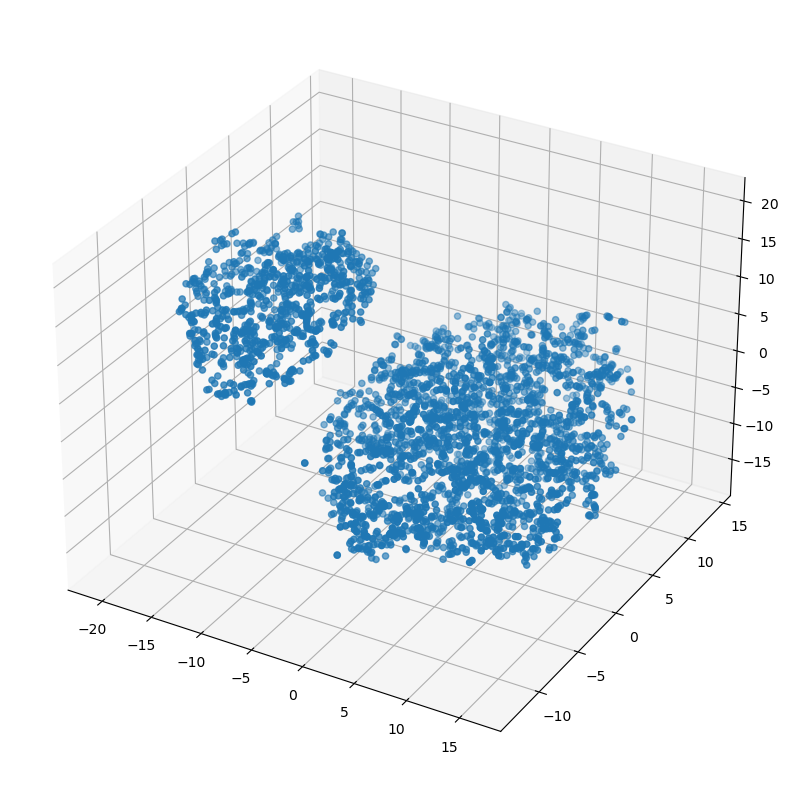